## Extract the Data

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install prophet
from prophet import Prophet






[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [35]:
# Code to extract Bitcoin prices data
# Example: pd.read_csv('path_to_bitcoin_prices_data.csv')

pd.read_csv('https://raw.githubusercontent.com/colaberry/data/master/Bitcoin/bitcoin_dataset.csv')

,Date,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
0,2/17/2010,0.00000,2043200.0,0.000000e+00,0.000000e+00,0.0000,0.000235,0,1.000000,0.000,...,31.781022,0.000000,241,244,41240,244,244,65173.130,36500.0000,0.000000e+00
1,2/18/2010,0.00000,2054650.0,0.000000e+00,0.000000e+00,0.0000,0.000241,0,1.000000,0.000,...,154.463801,0.000000,234,235,41475,235,235,18911.740,7413.0000,0.000000e+00
2,2/19/2010,0.00000,2063600.0,0.000000e+00,0.000000e+00,0.0000,0.000228,0,1.000000,0.000,...,1278.516635,0.000000,185,183,41658,183,183,9749.980,700.0000,0.000000e+00
3,2/20/2010,0.00000,2074700.0,0.000000e+00,0.000000e+00,0.0000,0.000218,0,1.000000,0.000,...,22186.687990,0.000000,224,224,41882,224,224,11150.030,50.0000,0.000000e+00
4,2/21/2010,0.00000,2085400.0,0.000000e+00,0.000000e+00,0.0000,0.000234,0,1.000000,0.000,...,689.179876,0.000000,218,218,42100,218,218,12266.830,1553.0000,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2901,1/27/2018,11524.77667,16830312.5,1.940000e+11,7.630946e+08,153844.0759,1.038548,0,1232.980892,11.600,...,1.778601,126.855696,541699,193578,295802277,188058,126082,1363301.068,119799.4611,1.380662e+09
2902,1/28/2018,11765.71000,16832287.5,1.980000e+11,7.381042e+08,154006.9753,1.031009,0,1350.924051,11.950,...,1.302242,117.430262,492738,213446,296015723,205967,137919,3128906.096,163590.5694,1.924759e+09
2903,1/29/2018,11212.65500,16834137.5,1.890000e+11,6.111197e+08,154157.6651,1.018174,0,1568.756757,12.275,...,1.243012,96.382352,532630,232176,296247899,225983,155772,1941048.853,160557.7065,1.800278e+09
2904,1/30/2018,10184.06167,16836225.0,1.710000e+11,1.266284e+09,154322.5790,0.987509,0,1416.820359,11.075,...,1.301143,96.749249,531440,236609,296484508,230310,158259,2359671.266,172755.8071,1.759356e+09


## Visualize the Data

In [36]:
# how could i convert the above data into a dataframe?
bitcoin_prices_df = pd.read_csv('https://raw.githubusercontent.com/colaberry/data/master/Bitcoin/bitcoin_dataset.csv')

In [37]:
# Code for initial visualization of the Bitcoin prices data
# Example: plt.plot(bitcoin_prices_df['Date'], bitcoin_prices_df['Price'])
bitcoin_prices_df = pd.read_csv('https://raw.githubusercontent.com/colaberry/data/master/Bitcoin/bitcoin_dataset.csv', usecols=['Date', 'btc_market_price'])

In [39]:
bitcoin_prices_df.rename(columns={'btc_market_price': 'Price'}, inplace=True)


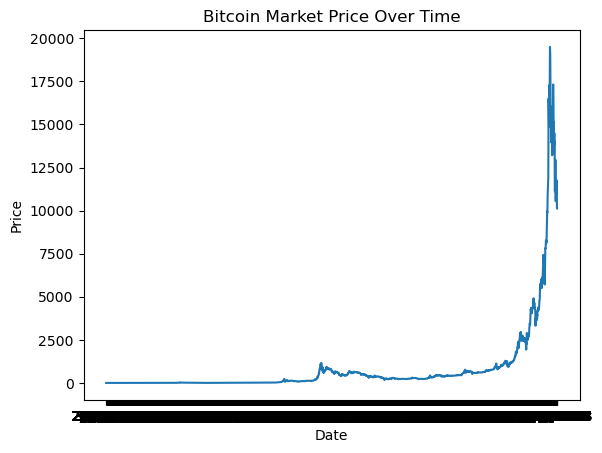

In [40]:
import matplotlib.pyplot as plt

plt.plot(bitcoin_prices_df['Date'], bitcoin_prices_df['Price'])
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Bitcoin Market Price Over Time')
plt.show()


## Cleanse the Data for Prophet

In [42]:
# Code to cleanse and prepare the data for Prophet
# Example: bitcoin_prices_df_prophet = bitcoin_prices_df[['Date', 'Price']]
bitcoin_prices_df_prophet = bitcoin_prices_df[['Date', 'Price']]
# bitcoin_prices_df_prophet.rename(columns={'Date': 'ds', 'Price': 'y'}, inplace=True)
bitcoin_prices_df_prophet.rename(columns={'Date': 'ds', 'Price': 'y'}, inplace=True)
display (bitcoin_prices_df_prophet).head()
display (bitcoin_prices_df_prophet).tail()


,ds,y
0,2/17/2010,0.00000
1,2/18/2010,0.00000
2,2/19/2010,0.00000
3,2/20/2010,0.00000
4,2/21/2010,0.00000
...,...,...
2901,1/27/2018,11524.77667
2902,1/28/2018,11765.71000
2903,1/29/2018,11212.65500
2904,1/30/2018,10184.06167


AttributeError: 'NoneType' object has no attribute 'head'

## Visualizations and Predictions with Prophet

In [43]:
# Code for making predictions with Prophet and visualizing the results
# Example: 
model = Prophet()
model.fit(bitcoin_prices_df_prophet)
# model.fit(bitcoin_prices_df_prophet)




13:21:48 - cmdstanpy - INFO - Chain [1] start processing
13:21:49 - cmdstanpy - INFO - Chain [1] done processing


In [44]:
future = model.make_future_dataframe(periods=365)

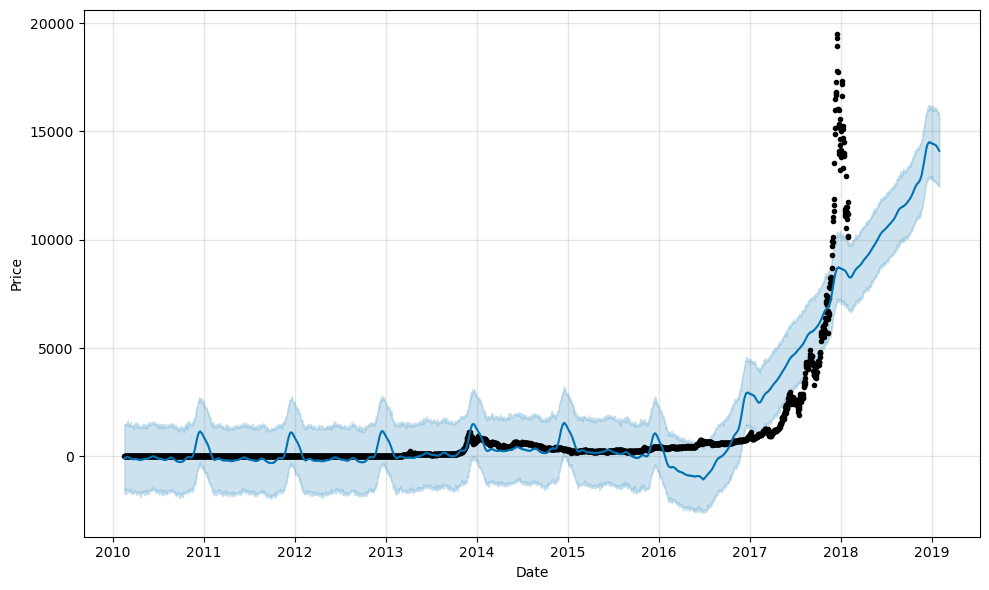

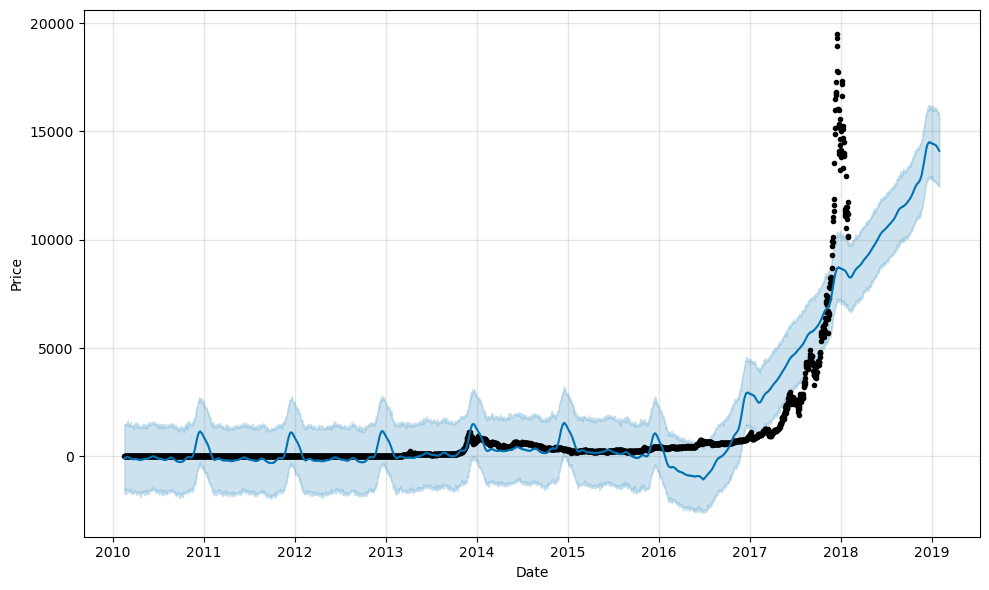

In [46]:
model.make_future_dataframe(periods=365)
forecast = model.predict(future)
model.plot(forecast, xlabel='Date', ylabel='Price')

## Extract the Cleansed Data into a CSV

In [48]:
# Code to export the cleansed data to a CSV file

# Example: bitcoin_prices_df_prophet.to_csv('cleansed_bitcoin_prices.csv', index=False)
bitcoin_prices_df_prophet.to_csv('cleansed_bitcoin_prices.csv', index=False)